# Toy data creation

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns # for seaborn style
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D

In [11]:
np.random.seed(1)

In [2]:
def scatter3D(df,**kwargs):
    """
    Function to plot 3D scatter plot.
    Takes as innput a pandas data frame
    with shape (x, 3).
    
    Notes:
     - requires matplotlib to be imported as
       import matplotlib.pyplot as plt
    
    Versioning
    - 0.1 by Ville Voutilainen
        Initial build
    """
    from mpl_toolkits.mplot3d import Axes3D
    if df.shape[1] != 3:
        raise ValueError('Data frame does not have three columns.')
    
    figsize       = kwargs.get('figsize',(9,5))
    edgecolor     = kwargs.get('edgecolor','k')
    scatter_s     = kwargs.get('scatter_s', 40)
    title         = kwargs.get('title', None)
    xlabel        = kwargs.get('xlabel', df.columns[0])
    ylabel        = kwargs.get('ylabel', df.columns[1])
    zlabel        = kwargs.get('zlabel', df.columns[2])
    azim          = kwargs.get('azim', 0)
    elev          = kwargs.get('elev', 20)
    xlim          = kwargs.get('xlim',None)
    ylim          = kwargs.get('ylim',None)
    zlim          = kwargs.get('zlim',None) 
    color         = kwargs.get('color',"steelblue")
    cmap          = kwargs.get('cmap',None)    
    return_plot   = kwargs.get('return_plot', True)    

    ###################################
    # Core plot
    ###################################        
    fig = plt.figure(figsize=figsize)        
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], 
               edgecolor = edgecolor, s=scatter_s, c = color, cmap=cmap)    
    ax.view_init(azim = azim, elev = elev)
    
    ###################################
    # Stylings
    ###################################
    if title is not None:
        ax.set_title(title)    
    if xlabel != 'none':
        ax.set_xlabel(xlabel)
    if ylabel != 'none':
        ax.set_ylabel(ylabel)
    if zlabel != 'none':
        ax.set_zlabel(zlabel)
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if zlim != None:
        ax.set_zlim(zlim)
        
    ###################################
    # Return
    ###################################    
    if return_plot == True:
        return fig, ax

In [12]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=3,random_state=0)

<IPython.core.display.Javascript object>


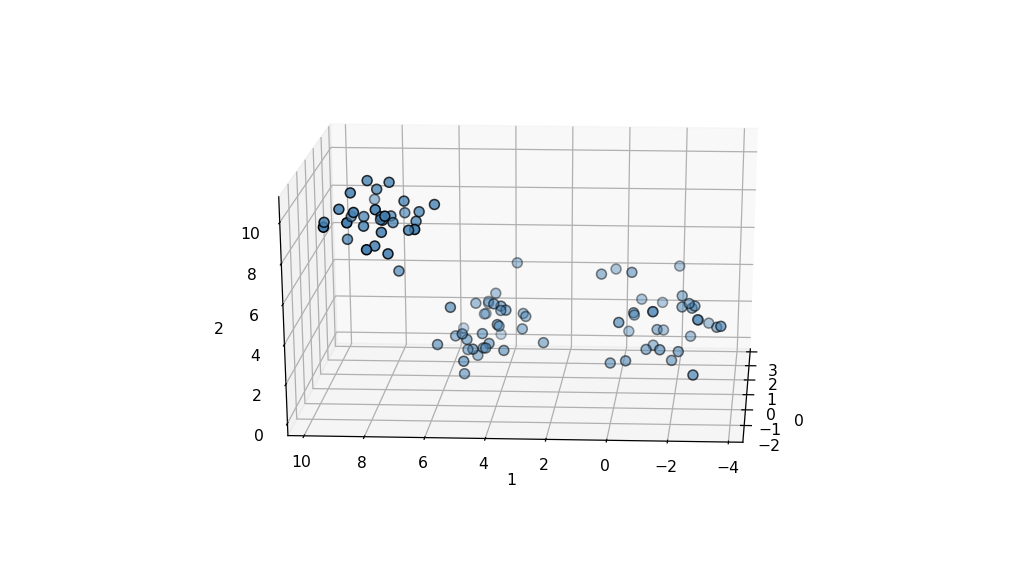

In [13]:
scatter3D(pd.DataFrame(X), return_plot = False)

<IPython.core.display.Javascript object>


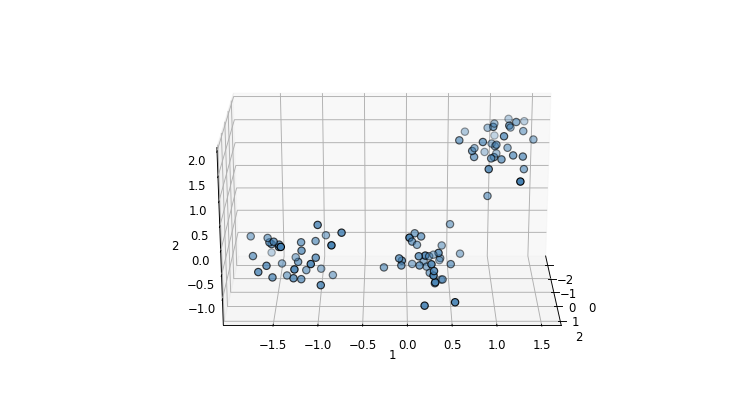

In [34]:
# Scale data
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
X = standardscaler.fit_transform(X)
scatter3D(pd.DataFrame(X), return_plot = False)

In [35]:
df = pd.DataFrame(X)
df.columns = ['x','z','y']
df['class'] = y
df['id'] = df.index

In [36]:
df.to_csv('original_data.csv',index=False)

In [37]:
codes = pd.read_csv('codes.csv')

In [39]:
codes.head()

,x,z,y,id,iter
0,-0.053294,-1.424280,-0.901311,point_0,1
1,-0.582404,1.069005,1.751524,point_1,1
2,-1.856429,0.737834,1.349084,point_2,1
3,0.935574,-1.393826,-0.711681,point_3,1
4,-1.411930,1.145947,1.486242,point_4,1


<IPython.core.display.Javascript object>


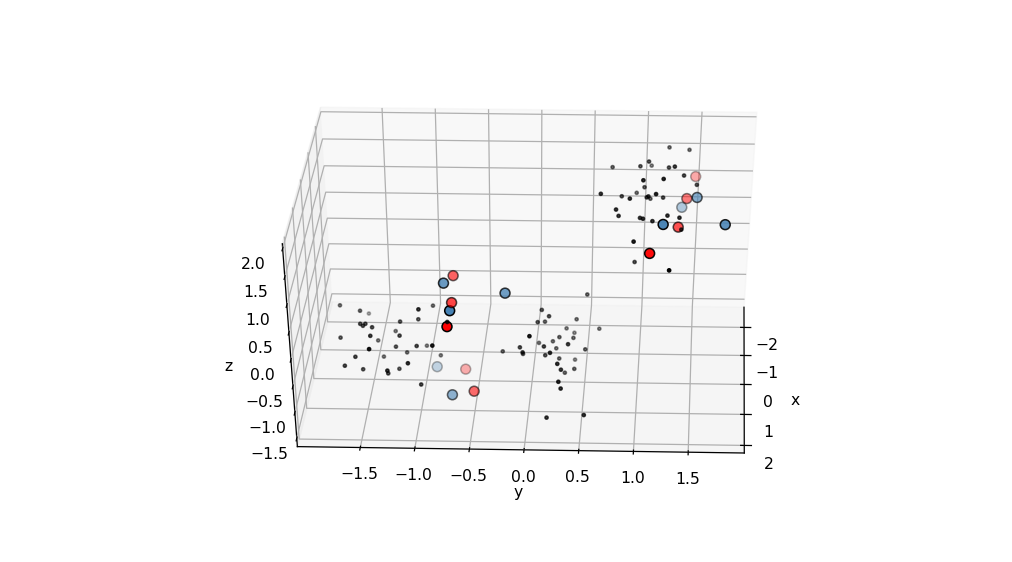

In [53]:
codes_plot = codes.loc[codes['iter'] == 1,['x','y','z']]
fix, ax = scatter3D(codes_plot, return_plot = True)

codes_plot = codes.loc[codes['iter'] == 100,['x','y','z']]
ax.scatter(codes_plot.iloc[:, 0], codes_plot.iloc[:, 1], codes_plot.iloc[:, 2], edgecolor = 'k', s=40, c = 'red')

ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], edgecolor = 'k', s=4, c = 'k')    
